In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## . Измените функцию ```calc_logloss``` так, чтобы нули по возможности не попадали в np.log (как вариант - использовать ```np.clip``` или ```np.where```).

Используем np.clip() - он "обрезает" элементы массива заданным интервалом. Например, если указать интервал [5, 10], то все значения в массиве, которые меньше 5 примут значение равное 5, а все значения больше 10, будут равны 10.

In [2]:
def calc_logloss(y_true, y_pred):
    '''логистическая функция плотерь'''
    k = 1e-9
    y_pred = y_pred.copy()
    y_pred = np.clip(y_pred, a_min=k, a_max=1-k)    # вот тут мы её ограничили ("обрубили" по краям, не допустив 0 и 1)
    err = - np.mean(y_true * np.log(y_pred) + (1.0 - y_true) * np.log(1.0 - y_pred))
    return err

In [3]:
def sigmoid(z):
    '''сигмоидная функция'''
    return 1 / (1 + np.exp(-z))


def standardization(X):
    '''функция стандартизации'''
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

## . На данных из урока изучите влияние гиперпараметров на ошибку алгоритма.

In [4]:
# код с урока
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],                          # intersept
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],                         # стаж репетитора
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],  # средняя стоимость занятия
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],               # возраст репетитора
              dtype=np.float64).T

y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0])  # подходит или нет репетитор

In [5]:
# смотрим без интерсепта

X[:, 1:]

array([[1.00e+00, 5.00e+02, 2.10e+01],
       [1.00e+00, 7.00e+02, 2.50e+01],
       [2.00e+00, 7.50e+02, 2.70e+01],
       [1.00e+00, 6.00e+02, 2.00e+01],
       [3.00e+00, 1.45e+03, 2.50e+01],
       [0.00e+00, 8.00e+02, 1.80e+01],
       [5.00e+00, 1.50e+03, 3.50e+01],
       [1.00e+01, 2.00e+03, 6.00e+01],
       [1.00e+00, 4.50e+02, 2.00e+01],
       [2.00e+00, 1.00e+03, 3.00e+01]])

In [6]:
# работать будем с копией, создаём её, стандартизируем её

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])
X_st

array([[ 1.        , -0.57142857, -0.97958969, -0.60595294],
       [ 1.        , -0.57142857, -0.56713087, -0.264571  ],
       [ 1.        , -0.21428571, -0.46401617, -0.09388003],
       [ 1.        , -0.57142857, -0.77336028, -0.69129842],
       [ 1.        ,  0.14285714,  0.97958969, -0.264571  ],
       [ 1.        , -0.92857143, -0.36090146, -0.86198939],
       [ 1.        ,  0.85714286,  1.08270439,  0.58888384],
       [ 1.        ,  2.64285714,  2.11385144,  2.72252095],
       [ 1.        , -0.57142857, -1.08270439, -0.69129842],
       [ 1.        , -0.21428571,  0.05155735,  0.16215642]])

In [7]:
# находим веса с помощью логистической регрессии

def eval_LR_model(X, y, eta=1e-4, iterations=10000):
    '''функция логистической регрессии'''
    iter_list, w_list, err_list = [], [], []
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(1, iterations + 1):
        z = np.dot(X, w)                       # это log(p/(1-p))
        pred = sigmoid(z)                      # p [0, 1]
        w -= eta * (1/n * np.dot((pred - y), X))
        err = calc_logloss(y, sigmoid(np.dot(X, w)))

        if i % (iterations / 10) == 0:
            w_list.append(list(w))
            iter_list.append(i)
            err_list.append(err)

    return iter_list, w_list, err_list

В примере будем менять количество итераций и смотреть на изменение LogLoss, график рисовать

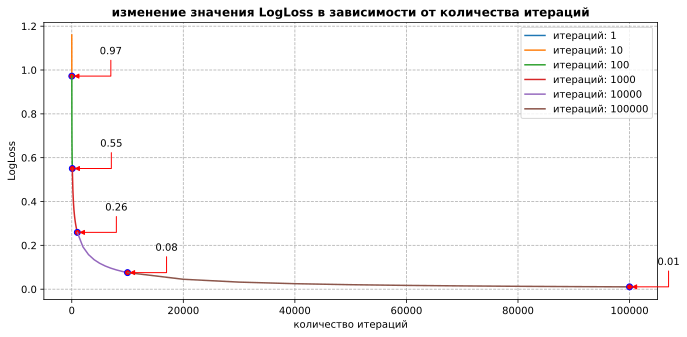

In [8]:
plt.figure(figsize=(11, 5))
for i in np.logspace(0, 5, 6):
    iter_list, w_list, err_list = eval_LR_model(X_st, y, iterations=int(i), eta=0.1)
    plt.plot(iter_list, err_list, label=f'итераций: {int(i)}')
    try:
        plt.annotate(np.round(err_list[-1], 2), xy=(iter_list[-1], err_list[-1]),
                    xytext=(iter_list[-1] + 5000, err_list[-1] + 0.1),
                    arrowprops = {'arrowstyle': '-|>', 'connectionstyle': 'angle', 'color': 'red'})
        plt.plot(iter_list[-1], err_list[-1], '-o', c='r', markersize=6, markeredgecolor='b')
    except:
        pass
plt.xlabel('количество итераций')
plt.ylabel('LogLoss')
plt.title('изменение значения LogLoss в зависимости от количества итераций', fontweight='bold')
plt.legend()
plt.grid(linestyle='--');

А здесь посмотрим на изменение LogLoss в зависимости от значения $\eta$

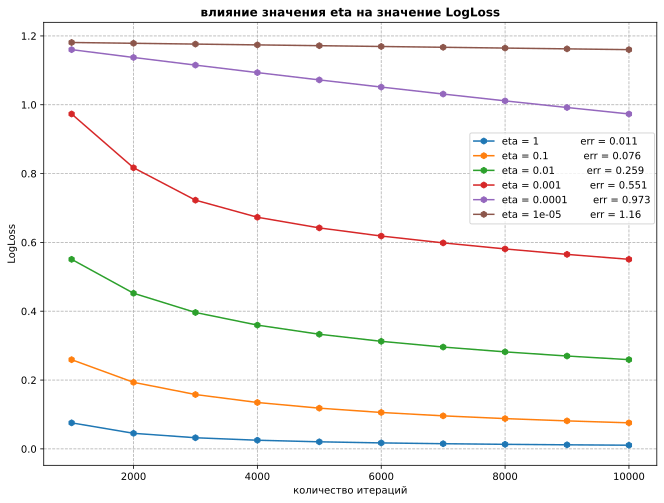

In [9]:
plt.figure(figsize=(11, 8))
eta = 1
for i in range(6):
    iter_list, w_list, err_list = eval_LR_model(X_st, y, iterations=10000, eta=eta)
    plt.plot(iter_list, err_list, '-h', label=f'eta = {eta:<12}  err = {np.round(err_list[-1], 3)}')

    spam = '0'*i+'1'
    eta = float('0.' + spam)

plt.xlabel('количество итераций')
plt.ylabel('LogLoss')
plt.title('влияние значения eta на значение LogLoss', fontweight='bold')
plt.legend(loc=(0.695, 0.545), borderaxespad=0)
plt.grid(linestyle='--');

## . Создайте функцию ```calc_pred_proba```, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией ```eval_LR_model```.

In [10]:
iter_list, w_list, err_list = eval_LR_model(X_st, y, iterations=1000, eta=0.1)

In [11]:
def calc_pred_proba(X, w):
    return np.round(sigmoid(X@w), 2)


calc_pred_proba(X_st, w_list[-1])

array([0.15, 0.21, 0.14, 0.36, 0.99, 0.88, 0.76, 0.02, 0.14, 0.34])

## . Создайте функцию ```calc_pred```, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией ```eval_LR_model```, а также порог вероятности.

In [12]:
def calc_pred(X, y, w, threshold):
    pred = sigmoid(X@w)
    print(f'вероятность = {np.round(pred, 2)}')
    print(f'истинные значения =    {y}')
    y_pred = np.where(pred > threshold, 1, 0)
    print(f'предсказанные классы = {y_pred}')
    return y_pred

In [13]:
y_pred = calc_pred(X_st, y, w_list[-1], 0.5)

вероятность = [0.15 0.21 0.14 0.36 0.99 0.88 0.76 0.02 0.14 0.34]
истинные значения =    [0 0 0 1 1 1 1 0 0 0]
предсказанные классы = [0 0 0 0 1 1 1 0 0 0]


## . (*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [14]:
# для проверки
from sklearn.metrics import confusion_matrix, accuracy_score, \
                            precision_score, recall_score, f1_score

In [15]:
print(f'на память себе, с чем работаем:\ny =      {y}\ny_pred = {y_pred}')

на память себе, с чем работаем:
y =      [0 0 0 1 1 1 1 0 0 0]
y_pred = [0 0 0 0 1 1 1 0 0 0]


In [16]:
def accuracy(y, y_pred):
    count = 0
    for i in range(len(y)):
        if y[i] == y_pred[i]:
            count += 1
    return count/len(y)         # или (TP+TN)/(TP+TN+FP+FN)

In [17]:
print(f'наша функция: {accuracy(y, y_pred)}\n'
      f'функция accuracy_score из sklearn.metrics: {accuracy_score(y, y_pred)}')

наша функция: 0.9
функция accuracy_score из sklearn.metrics: 0.9


In [18]:
# второй вариант
def accuracy2(y, y_pred):
    return np.mean(y == y_pred)


accuracy2(y, y_pred)

0.9

In [19]:
def conf_matrix(y, y_pred):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 0:
            if y[i] == y_pred[i]:
                TN += 1
            else:
                FP += 1
        else:
            if y[i] == y_pred[i]:
                TP += 1
            else:
                FN += 1
    return np.array([[TN, FP],
                     [FN, TP]])

In [20]:
print(f'наша функция: \n{conf_matrix(y, y_pred)}\n'
      f'функция confusion_matrix из sklearn.metrics: \n{confusion_matrix(y, y_pred)}')

наша функция: 
[[6 0]
 [1 3]]
функция confusion_matrix из sklearn.metrics: 
[[6 0]
 [1 3]]


In [21]:
def precision(y, y_pred):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 0:
            if y[i] == y_pred[i]:
                TN += 1
            else:
                FP += 1
        else:
            if y[i] == y_pred[i]:
                TP += 1
            else:
                FN += 1
    return TP/(TP+FP)

In [22]:
print(f'наша функция: {precision(y, y_pred)}\n'
      f'функция precision_score из sklearn.metrics: {precision_score(y, y_pred)}')

наша функция: 1.0
функция precision_score из sklearn.metrics: 1.0


In [23]:
def recall(y, y_pred):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 0:
            if y[i] == y_pred[i]:
                TN += 1
            else:
                FP += 1
        else:
            if y[i] == y_pred[i]:
                TP += 1
            else:
                FN += 1
    return TP/(TP+FN)

In [24]:
print(f'наша функция: {recall(y, y_pred)}\n'
      f'функция recall_score из sklearn.metrics: {recall_score(y, y_pred)}')

наша функция: 0.75
функция recall_score из sklearn.metrics: 0.75


In [25]:
def F1(y, y_pred):
    TP, FP, FN, TN = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 0:
            if y[i] == y_pred[i]:
                TN += 1
            else:
                FP += 1
        else:
            if y[i] == y_pred[i]:
                TP += 1
            else:
                FN += 1
    return 2*((TP/(TP+FP))*(TP/(TP+FN)))/(((TP/(TP+FP))+(TP/(TP+FN))))

In [26]:
print(f'наша функция: \n{F1(y, y_pred)}\n'
      f'функция f1_score из sklearn.metrics: \n{f1_score(y, y_pred)}')

наша функция: 
0.8571428571428571
функция f1_score из sklearn.metrics: 
0.8571428571428571
